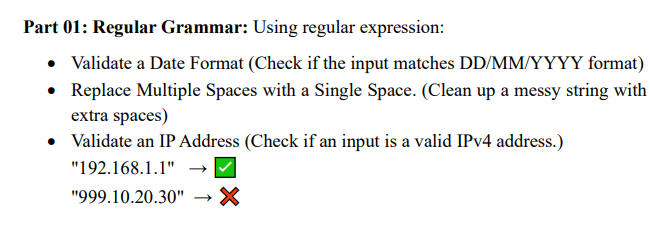

#Part 01 — Regular Grammar (Using Regular Expressions)


#Task 1: Validate a Date Format (DD/MM/YYYY)

In [ ]:
import re

def validate_date(date):
    pattern = r"^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[0-2])/[0-9]{4}$"
    if re.match(pattern, date):
        print(f"{date} → Valid date format")
    else:
        print(f"{date} → Invalid date format")

In [ ]:

print("---- Validate Date Format ----")
validate_date("25/10/2025")
validate_date("31/02/2023")

---- Validate Date Format ----
25/10/2025 → Valid date format
31/02/2023 → Valid date format


#Explanation:

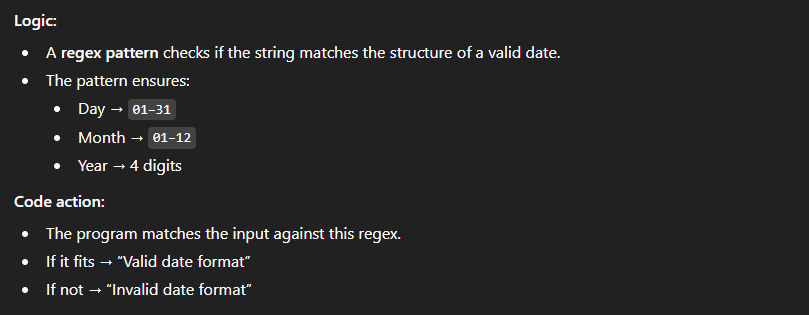

#Task 2: Replace Multiple Spaces with a Single Space

In [ ]:
def clean_spaces(text):
    cleaned = re.sub(r"\s+", " ", text.strip())
    print("Before:", text)
    print("After: ", cleaned)

In [ ]:
print("\n---- Replace Multiple Spaces ----")
clean_spaces("This   is   a     messy     string.")


---- Replace Multiple Spaces ----
Before: This   is   a     messy     string.
After:  This is a messy string.


#Explanation:

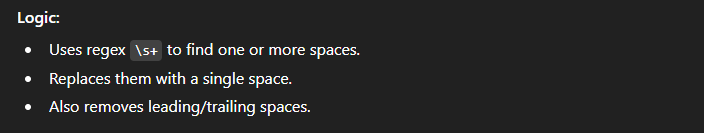

#Task 3: Validate an IP Address (IPv4)

In [ ]:

def validate_ip(ip):
    pattern = r"^(([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.){3}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])$"
    if re.match(pattern, ip):
        print(f"{ip} → Valid IP Address")
    else:
        print(f"{ip} → Invalid IP Address")

In [ ]:
print("\n---- Validate IP Address ----")
validate_ip("192.168.1.1")
validate_ip("999.10.20.30")



---- Validate IP Address ----
192.168.1.1 → Valid IP Address
999.10.20.30 → Invalid IP Address


#Explanation:

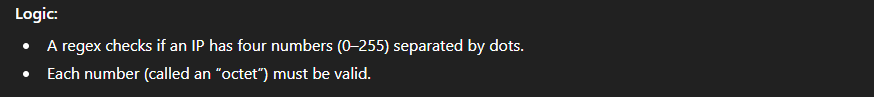

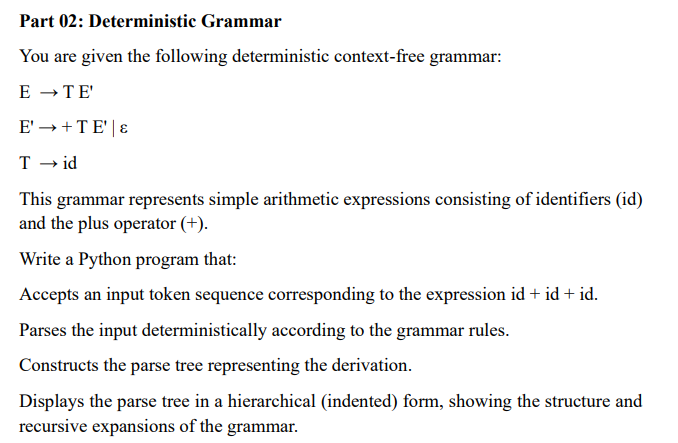

#Deterministic Grammar Parser with Tree Display

In [ ]:

# Grammar (for reference):
# E  → T E'
# E' → + T E' | ε
# T  → id

In [ ]:
tokens = ["id", "+", "id", "+", "id"]
index = 0


# PARSER IMPLEMENTATION

In [ ]:
def parse_E():
    global index
    node = ["E"]
    node.append(parse_T())
    node.append(parse_E_prime())
    return node

def parse_E_prime():
    global index
    node = ["E'"]
    if index < len(tokens) and tokens[index] == "+":
        index += 1
        node.append("+")
        node.append(parse_T())
        node.append(parse_E_prime())
    else:
        node.append("ε")
    return node

def parse_T():
    global index
    node = ["T"]
    if index < len(tokens) and tokens[index] == "id":
        node.append("id")
        index += 1
    else:
        node.append("Error: Expected 'id'")
    return node

#TREE DISPLAY FUNCTION

In [ ]:
def print_tree(node, level=0):
    indent = "  " * level
    if isinstance(node, list):
        print(f"{indent}{node[0]}")
        for child in node[1:]:
            print_tree(child, level + 1)
    else:
        print(f"{indent}{node}")

#RUNNING PARSER

In [ ]:

print("Parsing started...\n")
tree = parse_E()

if index == len(tokens):
    print("\n Parsing successful!\n")
else:
    print("\n Parsing failed!\n")

print("Parse Tree (Hierarchical Structure):\n")
print_tree(tree)


Parsing started...


 Parsing successful!

Parse Tree (Hierarchical Structure):

E
  T
    id
  E'
    +
    T
      id
    E'
      +
      T
        id
      E'
        ε


#Explanation:

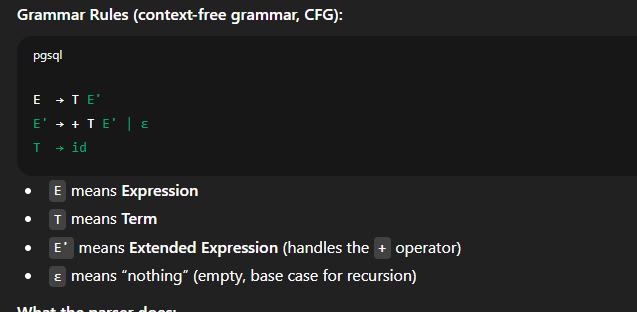

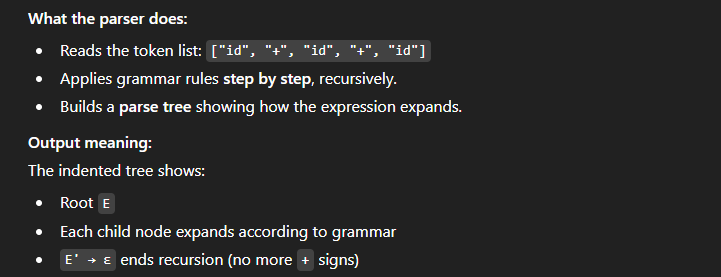

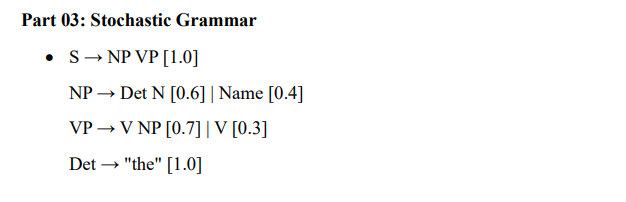

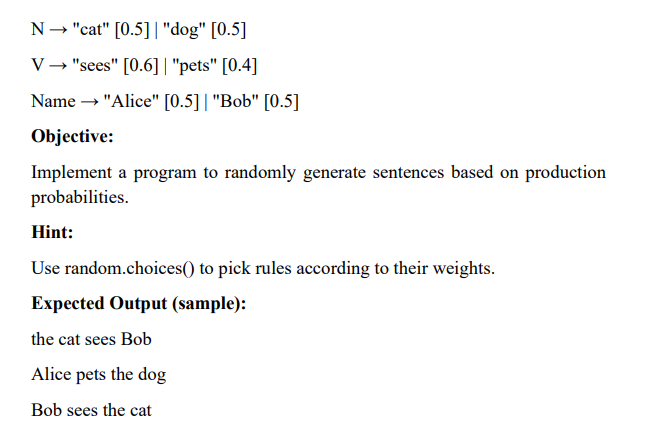

#(a) — Stochastic Grammar: Random Sentence Generation

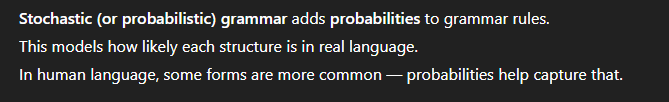

In [ ]:

import random

grammar = {
    "S": [("NP VP", 1.0)],
    "NP": [("Det N", 0.6), ("Name", 0.4)],
    "VP": [("V NP", 0.7), ("V", 0.3)],
    "Det": [("the", 1.0)],
    "N": [("cat", 0.5), ("dog", 0.5)],
    "V": [("sees", 0.6), ("pets", 0.4)],
    "Name": [("Alice", 0.5), ("Bob", 0.5)]
}

def generate(symbol):
    if symbol not in grammar:
        return symbol
    rules, probs = zip(*grammar[symbol])
    chosen_rule = random.choices(rules, probs)[0]
    return " ".join(generate(sym) for sym in chosen_rule.split())



#Generating random sentences



In [ ]:

print("Generated Sentences:")
for _ in range(5):
    print(generate("S"))


Generated Sentences:
Bob sees
the cat sees
the cat pets the dog
Bob sees the cat
Bob sees the cat


#Explanation:

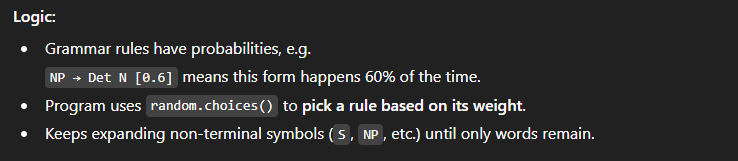

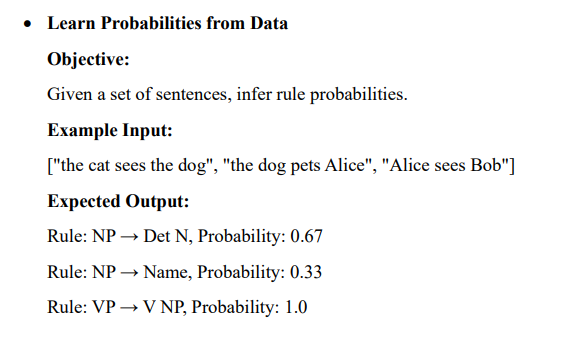

#(b) — Learn Probabilities from Data


In [ ]:
from collections import Counter

# Example input sentences

In [ ]:
sentences = ["the cat sees the dog", "the dog pets Alice", "Alice sees Bob"]

# Containers to record observed grammar rule types

In [ ]:
np_rules = []
vp_rules = []

for s in sentences:
    words = s.split()

    # Identify NP type (first word 'the' → Det N, otherwise → Name)
    if words[0] == "the":
        np_rules.append("NP → Det N")
    else:
        np_rules.append("NP → Name")

    # VP rule always V NP in this simplified dataset
    vp_rules.append("VP → V NP")

# Counting how many times each rule appears

In [ ]:
np_counts = Counter(np_rules)
vp_counts = Counter(vp_rules)

# Calculating total occurrences



In [ ]:

total_np = sum(np_counts.values())
total_vp = sum(vp_counts.values())

# Displaying learned probabilities in clean format

In [ ]:
print("Learned Rule Probabilities:\n")

Learned Rule Probabilities:



In [ ]:
# For NP rules
for rule, count in np_counts.items():
    prob = count / total_np
    print(f"Rule: {rule}, Probability: {prob:.2f}")

# For VP rules
for rule, count in vp_counts.items():
    prob = count / total_vp
    print(f"Rule: {rule}, Probability: {prob:.2f}")


Rule: NP → Det N, Probability: 0.67
Rule: NP → Name, Probability: 0.33
Rule: VP → V NP, Probability: 1.00


#Explanation:

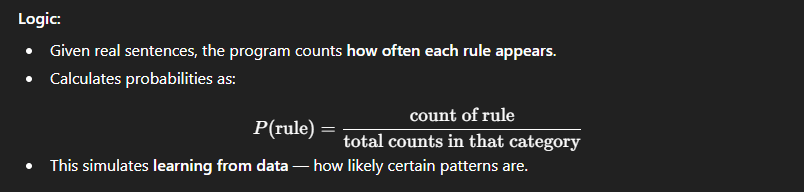

#Conclusion:

| Type                      | Key Idea                            | What It Does                                    | Example Use                        |
| ------------------------- | ----------------------------------- | ----------------------------------------------- | ---------------------------------- |
| **Regular Grammar**       | Pattern-based, non-hierarchical     | Recognizes simple string patterns               | Regex for validation               |
| **Deterministic Grammar** | One clear parsing rule at each step | Builds structure (parse tree) without ambiguity | Compilers, syntax analyzers        |
| **Stochastic Grammar**    | Grammar with probabilities          | Models how natural language occurs              | Probabilistic NLP, text generation |
